# Create the virtual "Conda env."

* conda create --prefix ./env python=3.7 -y
* to activate Enviornment:-
* source activate ./env
* or 
* conda activate ./env      * always used when you run it first time after creation


* Now create requirement file to install all the packaage:-
* requerment.txt:-
"""matplotlib
seaborn
notebook
numpy
joblib
pandas
"""
* pip install -r requirements.txt

### Import the lib

In [36]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")  ## optional - it just style

#### __init__ --> fit -> _z_outcome, activation_function, predict -> total loss -> save

* let's create class of perceptron:
* eta--> learning rate

* def _z_outcome(self)---> define as internal function
* activation function = f(z)
* fit--> try to change the model eg machine algo we use fit
* predict --> predict method
* save -- save the model
* load -- load the model

#### Fit :-  
* x : input data and y : label
* we attach bias with them :-- "np.c_" use for the concatination
* concat (self.x, with column matrix)
* np.ones(3,1) ---> [[1. 1. 1.]]   (3*1) matrix of 1 element
* y_hat :- predicted value

##### activation function:-  z>0 or +ve--> 1 or z< 0 ---->0
* np.where(z > 0, 1 , 0)  it' mean z>0 pass the value 1 or else pass 0

* which epochs  and out of how many eochs:- {epochs+1}/{self.epochs} : \n{self.weights} --> current epochs,div (no.of epochs ) and show the current weight

##### Total loss
* after passing all the data what is total loss or average loss
* sum of all error
##### save
* in case we require where we want to save the file(filename) and model directory where we save the model.
* model dir --> try to create a folder and save 
* "os.makedirs"--> implement the dir or make the dir 

### joblib.dump(self, model_file_path)
* dump all the self value
* all model file path

In [37]:
class Perceptron:
    def __init__(self, eta : float = None, epochs: int = None):
        self.weights = np.random.randn(3) * 1e-4  # for small random weight we get after multiply with tiny no. 1e-4
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        self.eta  = eta
        self.epochs = epochs
        
    # (_z_outcome is the internal function and it not utilize from outside / hidden )
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z>0, 1, 0)
    
    def fit(self, X , y):  
        self.X = X
        self.y = y
        
        # X with the bias weight x1w1, x2w2...
        X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X with bias: \n{X_with_bias}")
        
        # Epoch
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            # Z dection function 
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass:\n{y_hat}")
            
            
            # Error:- y-yhat
            self.error = self.y - y_hat
            print(f"Error: \n{self.error}")
            
            
            # update weight:- (wnew = wold + eta.error.x)
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error) # X_with_bias.transpose
            print(f"update weights after epoch : {epoch + 1}/{self.epochs}:\n{self.weights}")
            print("##"*10)
            
        
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X),1))]
        z = self._z_outcome(X_with_bias,self.weights)  # current x and updated weight
        return self.activation_function(z)

        
    # total_loss is equal to sum of all error
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\n total loss: {total_loss}\n")
        return total_loss

    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok= True)
        return os.path.join(model_dir, filename)


    def save(self, filename, model_dir = None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self,model_file_path)                                    # dump the model into binary path
        else:
             # if we did not given any file name in that case we will create the model dir amd filepath for you 
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self, model_file_path )


    def load(self, filepath):
        return joblib.load(filepath)    

In [38]:
# let's define the data set in case we are working on the dataset and gate
# AND get data set
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
}
df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [39]:
# now segrigate this so we can pass to the function
def prepare_data(df, target_col = "y"):
    X = df.drop(target_col , axis = 1)
    y = df[target_col]
    
    return X,y

In [40]:
#Let's use the perceptron class

X, y = prepare_data(df_AND)  # target col = y  default

ETA = 0.1  # 0 and 1
EPOCHS = 10  # total 10 rounds

model_and = Perceptron(eta = ETA, epochs=EPOCHS)
# now we call the fit method
model_and.fit(X,y)

# also we calculate the total loss
model_and.total_loss()

initial weights before training: 
[-8.69843355e-05  1.48609429e-04  6.95904989e-06]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass:
[0 1 0 1]
Error: 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
update weights after epoch : 1/10:
[-8.69843355e-05 -9.98513906e-02  1.00006959e-01]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass:
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
update weights after epoch : 2/10:
[9.99130157e-02 1.48609429e-04 6.95904989e-06]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass:
[0 1 1 1]
Error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
update weights after epoch : 3/10:
[-8.69843355e-05 -9.98513906e-02  2.00006959e-01]
####################
--------------------
for epoch >> 3
------

0

In [41]:
# to save the model:
model_and.save(filename= "and_model")

In [42]:
# reload the model and check it can predict or not 
# Perceptron() it mean it keys are null we not training --> [epochs and eta ]--> null
reload_and_model = Perceptron().load(filepath="model/and_model")

In [43]:
reload_and_model.predict(X = [[1,0]])  # because input in 2 dim

array([0])

In [44]:
reload_and_model.predict(X = [[1,1]])

array([1])

In [45]:
# Let's for OR gate

OR = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,1,1,1]
}
df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [46]:
# Let's use the perceptron class

X, y = prepare_data(df_OR)  # target col = y  default

ETA = 0.1  # 0 and 1
EPOCHS = 10  # total 10 rounds

model_or = Perceptron(eta = ETA, epochs=EPOCHS)
# now we call the fit method
model_or.fit(X,y)

# also we calculate the total loss
model_or.total_loss()

initial weights before training: 
[-1.70745235e-04  1.40417872e-04  2.61871744e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass:
[0 1 0 0]
Error: 
0    0
1    0
2    1
3    1
Name: y, dtype: int64
update weights after epoch : 1/10:
[ 0.19982925  0.10014042 -0.19997381]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass:
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
update weights after epoch : 2/10:
[ 0.19982925  0.10014042 -0.09997381]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass:
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
update weights after epoch : 3/10:
[1.99829255e-01 1.00140418e-01 2.61871744e-05]
####################
--------------------
for epoch >> 3
--------------------
predicted

0

In [47]:
# to save or model
model_or.save(filename="or_model")

In [48]:
reload_or_model = Perceptron().load(filepath="model/or_model")

In [49]:
reload_or_model.predict(X= [[1,1]])

array([1])

In [50]:
reload_or_model.predict(X = [[0,0]])

array([0])

In [51]:
# XOR gate

XOR = {
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,1,1,0]
}
df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [52]:
# Let's use the perceptron class

X, y = prepare_data(df_XOR)  # target col = y  default

ETA = 0.1  # 0 and 1
EPOCHS = 10  # total 10 rounds

model_xor = Perceptron(eta = ETA, epochs=EPOCHS)
# now we call the fit method
model_xor.fit(X,y)

# also we calculate the total loss
model_xor.total_loss()

initial weights before training: 
[-2.07253548e-04  5.26816541e-05  4.51167829e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass:
[0 1 0 0]
Error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
update weights after epoch : 1/10:
[ 9.97927465e-02  5.26816541e-05 -9.99548832e-02]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass:
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
update weights after epoch : 2/10:
[-0.00020725 -0.09994732  0.10004512]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass:
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
update weights after epoch : 3/10:
[ 9.97927465e-02  5.26816541e-05 -9.99548832e-02]
####################
--------------------
for epoch >> 3
---------------

-2

##### NOTE:- Disadvantage of Perceptron
* OR, AND ---> total loss =0
* XOR ---> total loss = -2
* Perceptron is "Linear Classifier"  it work on the linear seperal dataset not for the non-linear dataset

#### Plot 
* _create_base_plot()--> represent this cordinate (x,y) or  x1 and x2 corrdinate
* _plot_decision_region() --> which is recall as blue and green
* ***************************************
*        df.plot(kind ="scatter", x = "x1", y ="x2", c = 'y', s = 100)
* "c" is color and 
* "s" is the diameter of the cicle
* "cmaps" color map

* plot the horizontal axis and vertical axis
* plt.axhline(y = 0) indicate where we plot on horizonatal line at y = 0
* plt.axvline
* Meshgrid :- meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing.d
* resolution:- to look graph more continues


In [57]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
    
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
        
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

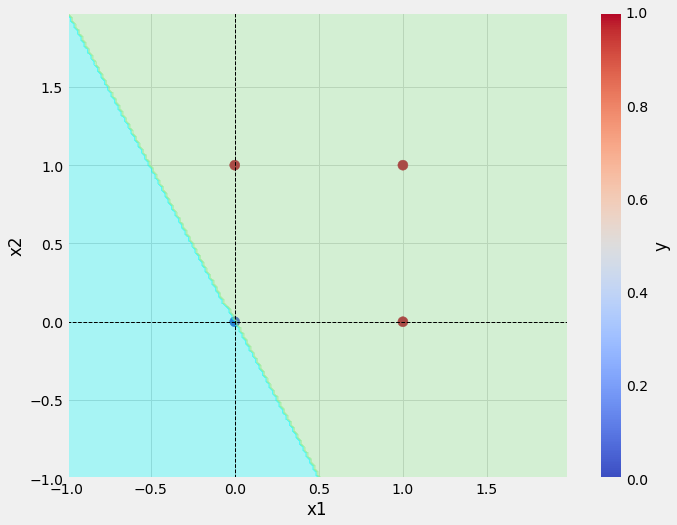

In [58]:
save_plot(df_OR, model_or, filename = "or.png")

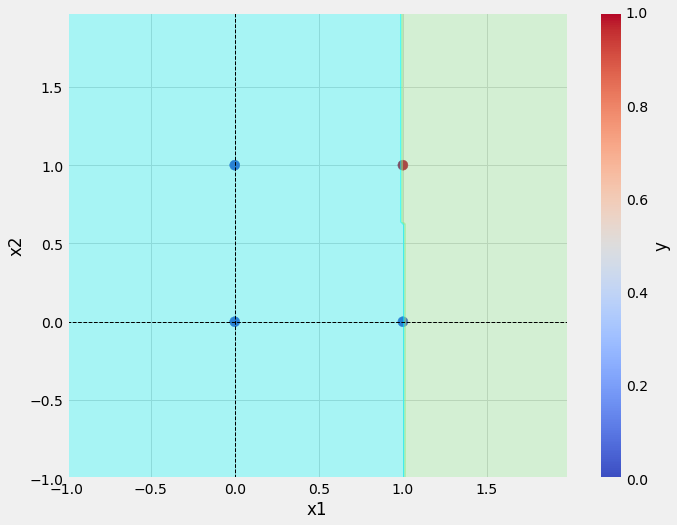

In [59]:
save_plot(df_AND, model_and, filename='and.png')

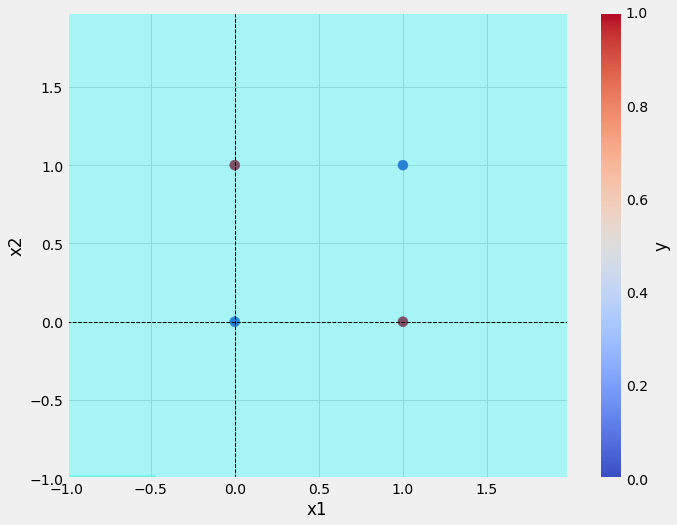

In [60]:
save_plot(df_XOR, model_xor, filename="xor.png")

* it never show me the conversion or boundary because there are 2 line (1,0) and (0,1) and try to draw a single line so this not seprate into perfect classes  it show error () so it not "linear seprebal"